In [1]:
import importlib.util
spec=importlib.util.spec_from_file_location("BoundaryLayerToolbox","/Users/claudiopierard/VC/BoundaryLayerToolbox.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [2]:
import numpy as np
import scipy as spy
import scipy.io as sio
import scipy.optimize as optimization
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
pd.set_option('html', False)
#import matplotlib.dates as mdates

In [3]:
apr_max_h = pd.read_csv("/Users/claudiopierard/VC/datos/alturas_maximas/cca/apr_max_heights.csv", index_col = 0)

In [4]:
apr_max_h.head()

   PBLH_24_max     time_PBLH_24_max  PBLH_48_max     time_PBLH_48_max  \
0          NaN                  NaN          NaN                  NaN   
1     2582.646  2015-04-02 15:00:00     2566.609  2015-04-02 17:00:00   
2     2704.135  2015-04-03 16:00:00     2604.081  2015-04-03 18:00:00   
3     2419.782  2015-04-04 17:00:00     2520.214  2015-04-04 18:00:00   
4     2583.058  2015-04-05 17:00:00     2835.543  2015-04-05 16:00:00   

   Raw_max         time_Raw_max  Filtered_max    time_Filtered_max  \
0   2940.0  2015-04-01 16:00:00        2610.0  2015-04-01 17:00:00   
1   1510.0  2015-04-02 23:00:00        1510.0  2015-04-02 23:00:00   
2   3000.0  2015-04-03 17:00:00        3000.0  2015-04-03 17:00:00   
3   3010.0  2015-04-04 14:00:00        3010.0  2015-04-04 14:00:00   
4   3340.0  2015-04-05 16:00:00        3340.0  2015-04-05 16:00:00   

   Raw_mean_max    time_Raw_mean_max  Filt_mean_max   time_Filt_mean_max  
0      2350.714  2015-04-01 17:00:00       1970.000  2015-04-01 1

In [5]:
apr_max_h['time_PBLH_24_max'] = pd.to_datetime(apr_max_h['time_PBLH_24_max'])

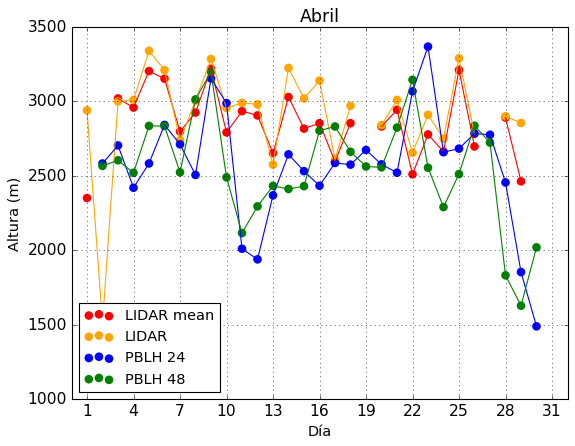

In [6]:
y = range(1,31)
plt.figure(figsize=(8,6))
plt.plot(y, apr_max_h['Raw_mean_max'], 'r', label = '_nolegend_')
plt.scatter(y, apr_max_h['Raw_mean_max'], c = 'red',  edgecolors='none', s = 60, label = 'LIDAR mean')

plt.plot(y, apr_max_h['Raw_max'], c='orange', label = '_nolegend_')
plt.scatter(y, apr_max_h['Raw_max'], c = 'orange',  edgecolors='none', s = 60, label = 'LIDAR')

plt.plot(y, apr_max_h['PBLH_24_max'], 'b', label = '_nolegend_')
plt.scatter(y, apr_max_h['PBLH_24_max'], c = 'blue',  edgecolors='none', s = 60, label = 'PBLH 24')

plt.plot(y, apr_max_h['PBLH_48_max'], 'g', label = '_nolegend_')
plt.scatter(y, apr_max_h['PBLH_48_max'], c = 'green',  edgecolors='none', s = 60, label = 'PBLH 48')
plt.xticks(range(1,32,3))
fs = 13
plt.grid()
plt.xlim(0,32)
#plt.title('apr')
plt.rcParams.update({'font.size': fs})
plt.xlabel('Día', fontsize = fs)
plt.ylabel('Altura (m)', fontsize = fs)
plt.legend(loc = 'lower left', fontsize = fs)
plt.tick_params(labelsize = 14)
plt.title('Abril')

# histograma

In [7]:
apr_max_h.time_PBLH_24_max

0                    NaT
1    2015-04-02 15:00:00
2    2015-04-03 16:00:00
3    2015-04-04 17:00:00
4    2015-04-05 17:00:00
5    2015-04-06 18:00:00
6    2015-04-07 18:00:00
7    2015-04-08 17:00:00
8    2015-04-09 17:00:00
9    2015-04-10 17:00:00
10   2015-04-11 13:00:00
11   2015-04-12 15:00:00
12   2015-04-13 16:00:00
13   2015-04-14 15:00:00
14   2015-04-15 15:00:00
15   2015-04-16 15:00:00
16   2015-04-17 17:00:00
17   2015-04-18 15:00:00
18   2015-04-19 14:00:00
19   2015-04-20 15:00:00
20   2015-04-21 15:00:00
21   2015-04-22 16:00:00
22   2015-04-23 15:00:00
23   2015-04-24 14:00:00
24   2015-04-25 15:00:00
25   2015-04-26 15:00:00
26   2015-04-27 15:00:00
27   2015-04-28 17:00:00
28   2015-04-29 11:00:00
29   2015-04-30 16:00:00
Name: time_PBLH_24_max, dtype: datetime64[ns]

In [8]:
freq_max_pblh24 = np.array([apr_max_h['time_PBLH_24_max'][i].hour for i in range(0,len(apr_max_h['time_PBLH_24_max']))])

In [9]:
freq_max_pblh24[~np.isnan(freq_max_pblh24)].max() - freq_max_pblh24[~np.isnan(freq_max_pblh24)].min()

7.0

In [10]:
apr_max_h.time_Raw_max

0     2015-04-01 16:00:00
1     2015-04-02 23:00:00
2     2015-04-03 17:00:00
3     2015-04-04 14:00:00
4     2015-04-05 16:00:00
5     2015-04-06 15:00:00
6     2015-04-07 13:00:00
7     2015-04-08 14:00:00
8     2015-04-09 15:00:00
9     2015-04-10 15:00:00
10    2015-04-11 19:00:00
11    2015-04-12 18:00:00
12    2015-04-13 19:00:00
13    2015-04-14 15:00:00
14    2015-04-15 15:00:00
15    2015-04-16 16:00:00
16    2015-04-17 13:00:00
17    2015-04-18 15:00:00
18                    NaN
19    2015-04-20 18:00:00
20    2015-04-21 16:00:00
21    2015-04-22 13:00:00
22    2015-04-23 18:00:00
23    2015-04-24 16:00:00
24    2015-04-25 15:00:00
25    2015-04-26 14:00:00
26                    NaN
27    2015-04-28 15:00:00
28    2015-04-29 17:00:00
29                    NaN
Name: time_Raw_max, dtype: object

(0, 15)

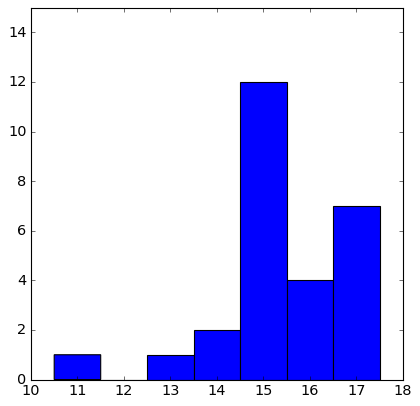

In [11]:
plt.figure(figsize=(6,6))
plt.hist(freq_max_pblh24[~np.isnan(freq_max_pblh24)], np.arange(10,18)+0.5)
plt.ylim(0, 15)

In [12]:
apr_max_h['time_Raw_max'] = pd.to_datetime(apr_max_h['time_Raw_max'])

In [13]:
xbins = np.arange(int(apr_max_h.time_Raw_max.dt.hour.min()), int(apr_max_h.time_Raw_max.dt.hour.max())+2)

In [14]:
xbins

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])

In [15]:
apr_max_h.time_Raw_max.dt.hour

0     16.0
1     23.0
2     17.0
3     14.0
4     16.0
5     15.0
6     13.0
7     14.0
8     15.0
9     15.0
10    19.0
11    18.0
12    19.0
13    15.0
14    15.0
15    16.0
16    13.0
17    15.0
18     NaN
19    18.0
20    16.0
21    13.0
22    18.0
23    16.0
24    15.0
25    14.0
26     NaN
27    15.0
28    17.0
29     NaN
Name: time_Raw_max, dtype: float64

(array([ 3.,  3.,  8.,  5.,  2.,  3.,  2.,  0.,  0.,  0.,  1.]),
 array([ 12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,  20.5,
         21.5,  22.5,  23.5]),
 <a list of 11 Patch objects>)

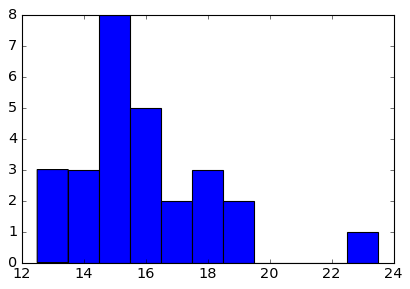

In [16]:
plt.hist(apr_max_h.time_Raw_max.dt.hour[~np.isnan(apr_max_h.time_Raw_max.dt.hour)], xbins-0.5)

<function matplotlib.pyplot.xticks>

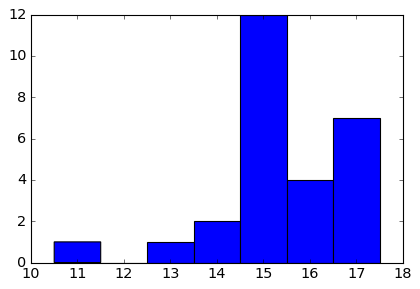

In [17]:
plt.hist(freq_max_pblh24[~np.isnan(freq_max_pblh24)], np.arange(10,18)+0.5)
plt.xticks

In [18]:
def no_data_time(df, mm, index, column):
    if type(df[mm][column][i]) == float:
        nothing
    else:
        return df[mm][column][i].hour
        

In [19]:
apr_max_h

    PBLH_24_max    time_PBLH_24_max  PBLH_48_max     time_PBLH_48_max  \
0           NaN                 NaT          NaN                  NaN   
1      2582.646 2015-04-02 15:00:00     2566.609  2015-04-02 17:00:00   
2      2704.135 2015-04-03 16:00:00     2604.081  2015-04-03 18:00:00   
3      2419.782 2015-04-04 17:00:00     2520.214  2015-04-04 18:00:00   
4      2583.058 2015-04-05 17:00:00     2835.543  2015-04-05 16:00:00   
5      2842.079 2015-04-06 18:00:00     2834.706  2015-04-06 18:00:00   
6      2711.694 2015-04-07 18:00:00     2523.408  2015-04-07 17:00:00   
7      2505.981 2015-04-08 17:00:00     3013.437  2015-04-08 16:00:00   
8      3154.769 2015-04-09 17:00:00     3198.755  2015-04-09 16:00:00   
9      2988.385 2015-04-10 17:00:00     2489.863  2015-04-10 15:00:00   
10     2009.970 2015-04-11 13:00:00     2115.104  2015-04-11 17:00:00   
11     1938.509 2015-04-12 15:00:00     2294.519  2015-04-12 15:00:00   
12     2368.584 2015-04-13 16:00:00     2432.241  2

In [20]:
time_lists = ['time_Filt_mean_max', 
              'time_Filtered_max', 
              'time_PBLH_24_max', 
              'time_PBLH_48_max', 
              'time_PBLH_avg_24_max', 
              'time_PBLH_avg_48_max',
              'time_Raw_max',
              'time_Raw_mean_max']

-----

# Gunshotplot de alturas máximas

In [23]:
import os

In [25]:
path2files = "/Users/claudiopierard/VC/datos/alturas_maximas/cca/"

In [27]:
os.listdir(path2files)

['apr_max_heights.csv',
 'aug_max_heights.csv',
 'dic_max_heights.csv',
 'feb_max_heights.csv',
 'jan_max_heights.csv',
 'jul_max_heights.csv',
 'jun_max_heights.csv',
 'mar_max_heights.csv',
 'may_max_heights.csv',
 'nov_max_heights.csv',
 'oct_max_heights.csv',
 'sep_max_heights.csv']

In [ ]:
dataframes_dict{}

In [29]:
dataframes_dict = {}

In [30]:
months = {'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'may': '05', 'jun': '06', 'jul': '07', 'aug': '08', 'sep': '09', 'oct':'10', 'nov':'11', 'dic': '12'}

In [37]:
names = list(months.keys())

In [45]:
A = pd.read_csv("/Users/claudiopierard/VC/datos/alturas_maximas/cca/apr_max_heights.csv", index_col= 0)
B = pd.read_csv("/Users/claudiopierard/VC/datos/alturas_maximas/cca/dic_max_heights.csv", index_col= 0)

In [69]:
pd.concat([A, B]).head()

   PBLH_24_max     time_PBLH_24_max  PBLH_48_max     time_PBLH_48_max  \
0          NaN                  NaN          NaN                  NaN   
1     2582.646  2015-04-02 15:00:00     2566.609  2015-04-02 17:00:00   
2     2704.135  2015-04-03 16:00:00     2604.081  2015-04-03 18:00:00   
3     2419.782  2015-04-04 17:00:00     2520.214  2015-04-04 18:00:00   
4     2583.058  2015-04-05 17:00:00     2835.543  2015-04-05 16:00:00   

   Raw_max         time_Raw_max  Filtered_max    time_Filtered_max  \
0   2940.0  2015-04-01 16:00:00        2610.0  2015-04-01 17:00:00   
1   1510.0  2015-04-02 23:00:00        1510.0  2015-04-02 23:00:00   
2   3000.0  2015-04-03 17:00:00        3000.0  2015-04-03 17:00:00   
3   3010.0  2015-04-04 14:00:00        3010.0  2015-04-04 14:00:00   
4   3340.0  2015-04-05 16:00:00        3340.0  2015-04-05 16:00:00   

   Raw_mean_max    time_Raw_mean_max  Filt_mean_max   time_Filt_mean_max  
0      2350.714  2015-04-01 17:00:00       1970.000  2015-04-01 1

In [58]:
months_df = {}
for i, name_file in enumerate(os.listdir(path2files)):
    print(name_file)
    months_df[name_file[:3]] = pd.read_csv(path2files + name_file, index_col= 0)

apr_max_heights.csv
aug_max_heights.csv
dic_max_heights.csv
feb_max_heights.csv
jan_max_heights.csv
jul_max_heights.csv
jun_max_heights.csv
mar_max_heights.csv
may_max_heights.csv
nov_max_heights.csv
oct_max_heights.csv
sep_max_heights.csv


In [67]:
colors = {1: 'red',2: 'blue',3: 'sienna',4: 'violet',5: 'lawngreen', 6: 'gold', 7: 'plum', 8: 'plum', 9:'powderblue', 10: 'salmon', 11: 'sandybrown', 0:'seagreen'}
"""
'plum'
'powderblue'
'purple'

'rosybrown'
'royalblue'
'saddlebrown'
'salmon'
'sandybrown'
'seagreen'

"""

"\n'plum'\n'powderblue'\n'purple'\n\n'rosybrown'\n'royalblue'\n'saddlebrown'\n'salmon'\n'sandybrown'\n'seagreen'\n\n"

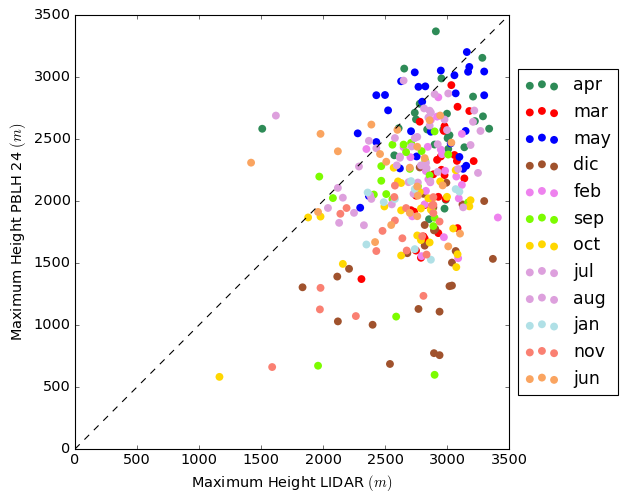

In [81]:
plt.figure(figsize=(7,7))
for i, name in enumerate(months_df.keys()):
    #print(i, name)
    plt.scatter(months_df[name]['Raw_max'], months_df[name]['PBLH_24_max'], c = colors[i], edgecolors='none', s = 50, label = name)
    
plt.xlim(0,3500)
plt.ylim(0,3500)
plt.plot([0,3500], [0,3500], 'k--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Maximum Height LIDAR $(m)$')
plt.ylabel('Maximum Height PBLH 24 $(m)$')

In [61]:
General = pd.concat(months_df)

In [63]:
General.shape

(365, 12)

In [ ]:
for 

--------

In [31]:
colors = {1: 'red',2: 'blue',3: 'sienna',4: 'violet',5: 'lawngreen', 6: 'gold'}

In [32]:
for mm in dataframes_names:
    for columna in time_lists:
        dataframes_dict[mm][columna] = pd.to_datetime(dataframes_dict[mm][columna], utc= True)

df 1
df 2
df 3
df 4
df 5
df 6


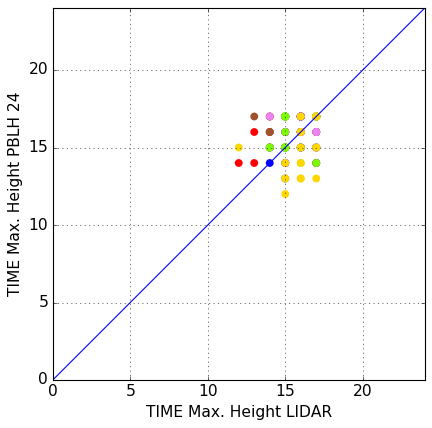

In [33]:
plt.figure(figsize=(6,6))
k = 0
for df in dataframes_names:
    k += 1
    print('df', k)
    for i in range(0, len(dataframes_dict[df]['time_PBLH_avg_24_max'])):
        #print(i)
        plt.scatter(dataframes_dict[df]['time_Raw_mean_max'][i].hour - 6, dataframes_dict[df]['time_PBLH_avg_24_max'][i].hour - 6, c = colors[k], edgecolors='none', s = 50, label = df)
plt.xlim(0,24)
plt.ylim(0,24)
plt.plot([0,24], [0,24])
plt.grid()
#plt.legend(loc = 'upper left', fontsize = 12)
plt.xlabel('TIME Max. Height LIDAR')
plt.ylabel('TIME Max. Height PBLH 24')
plt.rcParams.update({'font.size': 14})


In [34]:
n = 10
A =dataframes_dict['apr']['time_Raw_mean_max'] - dataframes_dict['apr']['time_PBLH_avg_24_max']

In [35]:
dataframes_dict['apr'].time_PBLH_24_max

0                    NaT
1    2015-04-02 21:00:00
2    2015-04-03 22:00:00
3    2015-04-04 23:00:00
4    2015-04-05 23:00:00
5    2015-04-06 23:00:00
6    2015-04-07 23:00:00
7    2015-04-08 23:00:00
8    2015-04-09 23:00:00
9    2015-04-10 23:00:00
10   2015-04-11 19:00:00
11   2015-04-12 21:00:00
12   2015-04-13 22:00:00
13   2015-04-14 21:00:00
14   2015-04-15 21:00:00
15   2015-04-16 21:00:00
16   2015-04-17 23:00:00
17   2015-04-18 21:00:00
18   2015-04-19 20:00:00
19   2015-04-20 21:00:00
20   2015-04-21 21:00:00
21   2015-04-22 22:00:00
22   2015-04-23 21:00:00
23   2015-04-24 20:00:00
24   2015-04-25 21:00:00
25   2015-04-26 21:00:00
26   2015-04-27 21:00:00
27   2015-04-28 23:00:00
28   2015-04-29 17:00:00
29   2015-04-30 22:00:00
Name: time_PBLH_24_max, dtype: datetime64[ns]

In [38]:
dataframes_dict['apr'].time_PBLH_24_max.dt.tz_localize('UTC').dt.tz_convert('Etc/GMT-6')

0                          NaT
1    2015-04-03 03:00:00+06:00
2    2015-04-04 04:00:00+06:00
3    2015-04-05 05:00:00+06:00
4    2015-04-06 05:00:00+06:00
5    2015-04-07 05:00:00+06:00
6    2015-04-08 05:00:00+06:00
7    2015-04-09 05:00:00+06:00
8    2015-04-10 05:00:00+06:00
9    2015-04-11 05:00:00+06:00
10   2015-04-12 01:00:00+06:00
11   2015-04-13 03:00:00+06:00
12   2015-04-14 04:00:00+06:00
13   2015-04-15 03:00:00+06:00
14   2015-04-16 03:00:00+06:00
15   2015-04-17 03:00:00+06:00
16   2015-04-18 05:00:00+06:00
17   2015-04-19 03:00:00+06:00
18   2015-04-20 02:00:00+06:00
19   2015-04-21 03:00:00+06:00
20   2015-04-22 03:00:00+06:00
21   2015-04-23 04:00:00+06:00
22   2015-04-24 03:00:00+06:00
23   2015-04-25 02:00:00+06:00
24   2015-04-26 03:00:00+06:00
25   2015-04-27 03:00:00+06:00
26   2015-04-28 03:00:00+06:00
27   2015-04-29 05:00:00+06:00
28   2015-04-29 23:00:00+06:00
29   2015-05-01 04:00:00+06:00
Name: time_PBLH_24_max, dtype: datetime64[ns, Etc/GMT-6]

In [39]:
pd.concat([dataframes_dict['apr']['time_Raw_mean_max'] , dataframes_dict['apr']['time_PBLH_avg_24_max'], A], axis=1)

     time_Raw_mean_max time_PBLH_avg_24_max                 0
0  2015-04-01 01:00:00                  NaT               NaT
1  2015-04-02 00:00:00  2015-04-02 21:00:00 -1 days +03:00:00
2  2015-04-03 23:00:00  2015-04-03 23:00:00          00:00:00
3  2015-04-04 21:00:00  2015-04-04 23:00:00 -1 days +22:00:00
4  2015-04-05 21:00:00  2015-04-05 23:00:00 -1 days +22:00:00
5  2015-04-06 23:00:00  2015-04-06 23:00:00          00:00:00
6  2015-04-07 21:00:00  2015-04-07 23:00:00 -1 days +22:00:00
7  2015-04-08 23:00:00  2015-04-08 23:00:00          00:00:00
8  2015-04-09 21:00:00  2015-04-09 23:00:00 -1 days +22:00:00
9  2015-04-10 21:00:00  2015-04-10 22:00:00 -1 days +23:00:00
10 2015-04-11 23:00:00  2015-04-11 20:00:00          03:00:00
11 2015-04-12 01:00:00  2015-04-12 21:00:00 -1 days +04:00:00
12 2015-04-13 00:00:00  2015-04-13 21:00:00 -1 days +03:00:00
13 2015-04-14 21:00:00  2015-04-14 21:00:00          00:00:00
14 2015-04-15 21:00:00  2015-04-15 21:00:00          00:00:00
15 2015-

In [41]:
plt.figure(figsize=(6,6))
k = 0
hour_diference = []
max_hour_pblh_24 = []
max_hour_LIDAR = []
for df in dataframes_names:
    k += 1
    print('df', k)
    for i in range(0, len(dataframes_dict[df]['time_PBLH_avg_24_max'])):
        #print(i)
        hour_diference.append(dataframes_dict[df]['time_Raw_mean_max'][i].hour - dataframes_dict[df]['time_PBLH_avg_24_max'][i].hour)
        max_hour_pblh_24.append(dataframes_dict[df]['time_PBLH_avg_24_max'][i].hour)
        max_hour_LIDAR.append(dataframes_dict[df]['time_Raw_mean_max'][i].hour)
        
hour_diference = np.array(hour_diference)
max_hour_pblh_24 = np.array(max_hour_pblh_24)
max_hour_LIDAR = np.array(max_hour_LIDAR)

df 1
df 2
df 3
df 4
df 5
df 6


In [79]:
num_data = hour_diference[~np.isnan(hour_diference)].max() - hour_diference[~np.isnan(hour_diference)].min()
num_pblh_24 = max_hour_pblh_24[~np.isnan(max_hour_pblh_24)].max() - max_hour_pblh_24[~np.isnan(max_hour_pblh_24)].min()
num_lidar = max_hour_LIDAR[~np.isnan(max_hour_LIDAR)].max() - max_hour_LIDAR[~np.isnan(max_hour_LIDAR)].min()

NameError: name 'hour_diference' is not defined

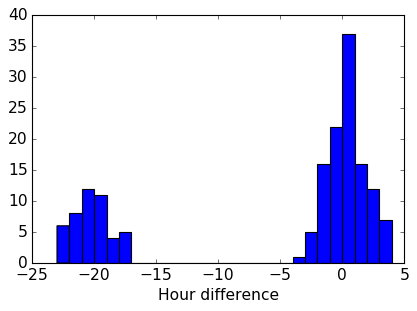

In [43]:
plt.hist(hour_diference[~np.isnan(hour_diference)], int(num_data))
plt.xlabel('Hour difference')

(array([  2.,   8.,  21.,  51.,  97.]),
 array([ 18.,  19.,  20.,  21.,  22.,  23.]),
 <a list of 5 Patch objects>)

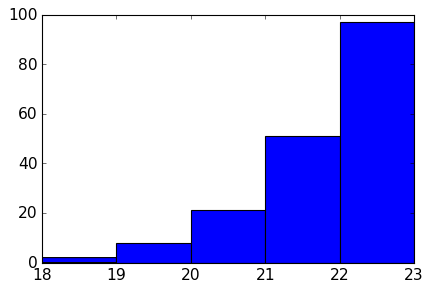

In [44]:
plt.hist(max_hour_pblh_24[~np.isnan(max_hour_pblh_24)], int(num_pblh_24))

(array([ 28.,  12.,   3.,   4.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   3.,  12.,  38.,
         63.]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.]),
 <a list of 23 Patch objects>)

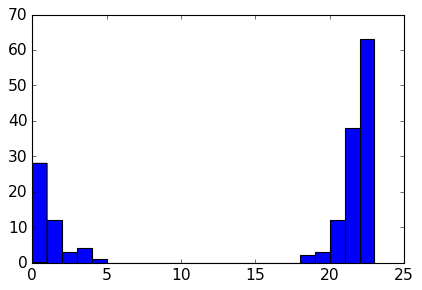

In [45]:
plt.hist(max_hour_LIDAR[~np.isnan(max_hour_LIDAR)] , int(num_lidar))

Abril

In [25]:
apr_max_h.keys()

Index(['PBLH_24_max', 'time_PBLH_24_max', 'PBLH_48_max', 'time_PBLH_48_max',
       'Raw_max', 'time_Raw_max', 'Filtered_max', 'time_Filtered_max',
       'Raw_mean_max', 'time_Raw_mean_max', 'Filt_mean_max',
       'time_Filt_mean_max'],
      dtype='object')

Diciembre

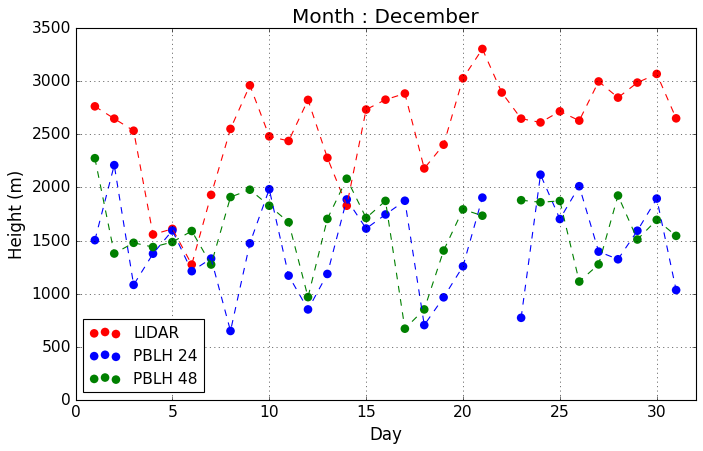

In [48]:
y = range(1,32)
plt.figure(figsize=(10,6))
plt.plot(y, dic_max_h['Raw_mean_max'], 'r--', label = '_nolegend_')
plt.scatter(y, dic_max_h['Raw_mean_max'], c = 'red',  edgecolors='none', s = 60, label = 'LIDAR')
plt.plot(y, dic_max_h['PBLH_avg_24_max'], 'b--', label = '_nolegend_')
plt.scatter(y, dic_max_h['PBLH_avg_24_max'], c = 'blue',  edgecolors='none', s = 60, label = 'PBLH 24')

plt.plot(y, dic_max_h['PBLH_avg_48_max'], 'g--', label = '_nolegend_')
plt.scatter(y, dic_max_h['PBLH_avg_48_max'], c = 'green',  edgecolors='none', s = 60, label = 'PBLH 48')

fs = 15
plt.grid()
plt.xlim(0,32)
#plt.title('DIC')
plt.rcParams.update({'font.size': fs})
plt.xlabel('Day', fontsize = fs)
plt.ylabel('Height (m)', fontsize = fs)
plt.legend(loc = 'lower left', fontsize = fs-1)
plt.tick_params(labelsize = 14)
plt.title('Month : December')

Enero

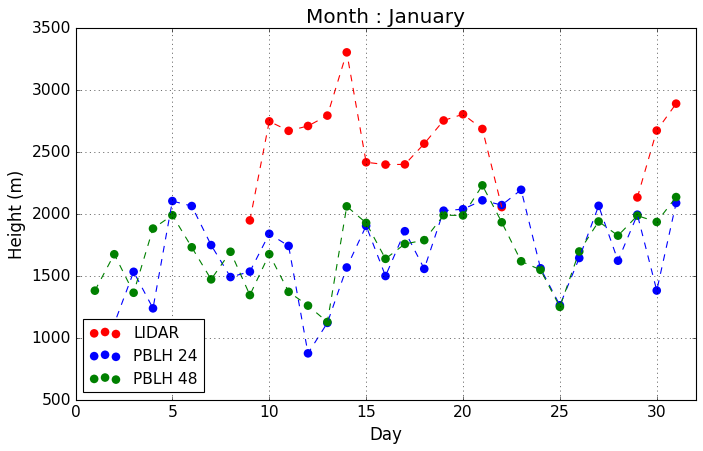

In [49]:
y = range(1,32)
plt.figure(figsize=(10,6))
plt.plot(y, jan_max_h['Raw_mean_max'], 'r--', label = '_nolegend_')
plt.scatter(y, jan_max_h['Raw_mean_max'], c = 'red',  edgecolors='none', s = 60, label = 'LIDAR')
plt.plot(y, jan_max_h['PBLH_avg_24_max'], 'b--', label = '_nolegend_')
plt.scatter(y, jan_max_h['PBLH_avg_24_max'], c = 'blue',  edgecolors='none', s = 60, label = 'PBLH 24')

plt.plot(y, jan_max_h['PBLH_avg_48_max'], 'g--', label = '_nolegend_')
plt.scatter(y, jan_max_h['PBLH_avg_48_max'], c = 'green',  edgecolors='none', s = 60, label = 'PBLH 48')

fs = 15
plt.grid()
plt.xlim(0,32)
#plt.title('jan')
plt.rcParams.update({'font.size': fs})
plt.xlabel('Day', fontsize = fs)
plt.ylabel('Height (m)', fontsize = fs)
plt.legend(loc = 'lower left', fontsize = fs-1)
plt.tick_params(labelsize = 14)
plt.title('Month : January')

Junio

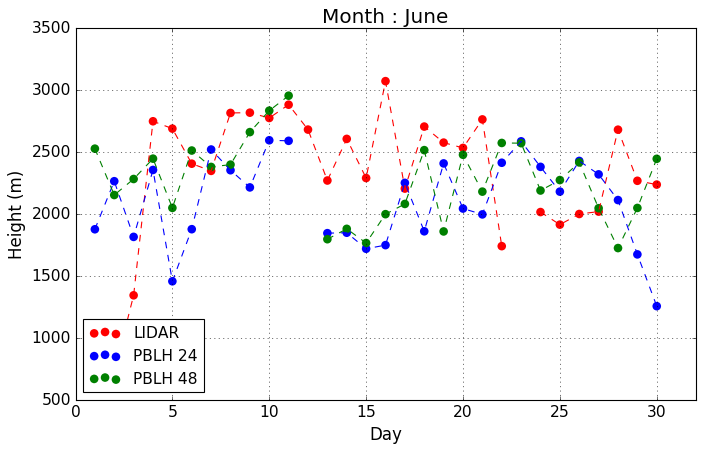

In [50]:
y = range(1,31)
plt.figure(figsize=(10,6))
plt.plot(y, jun_max_h['Raw_mean_max'], 'r--', label = '_nolegend_')
plt.scatter(y, jun_max_h['Raw_mean_max'], c = 'red',  edgecolors='none', s = 60, label = 'LIDAR')
plt.plot(y, jun_max_h['PBLH_avg_24_max'], 'b--', label = '_nolegend_')
plt.scatter(y, jun_max_h['PBLH_avg_24_max'], c = 'blue',  edgecolors='none', s = 60, label = 'PBLH 24')

plt.plot(y, jun_max_h['PBLH_avg_48_max'], 'g--', label = '_nolegend_')
plt.scatter(y, jun_max_h['PBLH_avg_48_max'], c = 'green',  edgecolors='none', s = 60, label = 'PBLH 48')

fs = 15
plt.grid()
plt.xlim(0,32)
#plt.title('jun')
plt.rcParams.update({'font.size': fs})
plt.xlabel('Day', fontsize = fs)
plt.ylabel('Height (m)', fontsize = fs)
plt.legend(loc = 'lower left', fontsize = fs-1)
plt.tick_params(labelsize = 14)
plt.title('Month : June')

marzo

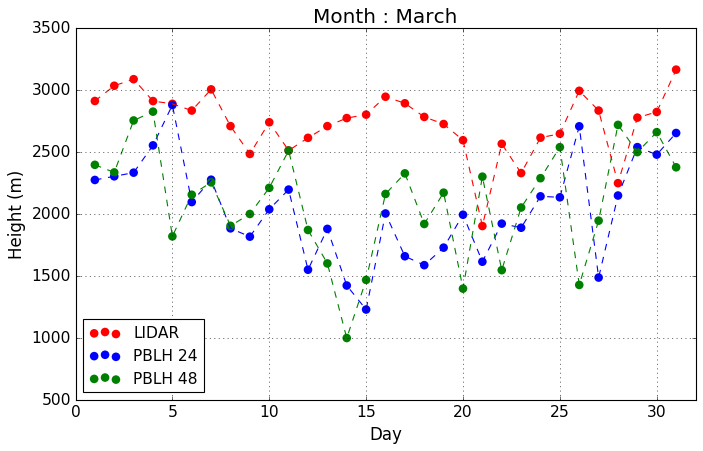

In [51]:
y = range(1,32)
plt.figure(figsize=(10,6))
plt.plot(y, mar_max_h['Raw_mean_max'], 'r--', label = '_nolegend_')
plt.scatter(y, mar_max_h['Raw_mean_max'], c = 'red',  edgecolors='none', s = 60, label = 'LIDAR')
plt.plot(y, mar_max_h['PBLH_avg_24_max'], 'b--', label = '_nolegend_')
plt.scatter(y, mar_max_h['PBLH_avg_24_max'], c = 'blue',  edgecolors='none', s = 60, label = 'PBLH 24')

plt.plot(y, mar_max_h['PBLH_avg_48_max'], 'g--', label = '_nolegend_')
plt.scatter(y, mar_max_h['PBLH_avg_48_max'], c = 'green',  edgecolors='none', s = 60, label = 'PBLH 48')

fs = 15
plt.grid()
plt.xlim(0,32)
#plt.title('mar')
plt.rcParams.update({'font.size': fs})
plt.xlabel('Day', fontsize = fs)
plt.ylabel('Height (m)', fontsize = fs)
plt.legend(loc = 'lower left', fontsize = fs-1)
plt.tick_params(labelsize = 14)
plt.title('Month : March')

Septiembre

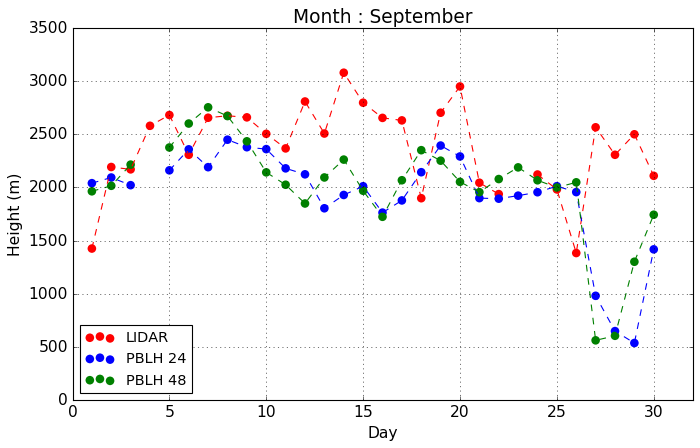

In [52]:
y = range(1,31)
plt.figure(figsize=(10,6))
plt.plot(y, sep_max_h['Raw_mean_max'], 'r--', label = '_nolegend_')
plt.scatter(y, sep_max_h['Raw_mean_max'], c = 'red',  edgecolors='none', s = 60, label = 'LIDAR')
plt.plot(y, sep_max_h['PBLH_avg_24_max'], 'b--', label = '_nolegend_')
plt.scatter(y, sep_max_h['PBLH_avg_24_max'], c = 'blue',  edgecolors='none', s = 60, label = 'PBLH 24')

plt.plot(y, sep_max_h['PBLH_avg_48_max'], 'g--', label = '_nolegend_')
plt.scatter(y, sep_max_h['PBLH_avg_48_max'], c = 'green',  edgecolors='none', s = 60, label = 'PBLH 48')

fs = 14
plt.grid()
plt.xlim(0,32)
#plt.title('sep')
plt.rcParams.update({'font.size': fs})
plt.xlabel('Day', fontsize = fs)
plt.ylabel('Height (m)', fontsize = fs)
plt.legend(loc = 'lower left', fontsize = fs-1)
plt.tick_params(labelsize = 14)
plt.title('Month : September')

# Plot alturas máximas vs lidar

In [53]:
all_dataframes = pd.concat(dataframes_dict)

In [54]:
popt_24, pcov_24 = optimization.curve_fit(blt.ajuste_lineal, all_dataframes.dropna()['Raw_mean_max'], all_dataframes.dropna()['PBLH_avg_24_max'])

In [55]:
popt_24

array([  1.20538426e+03,   2.99595248e-01])

In [56]:
xx = np.linspace(0, 3500)

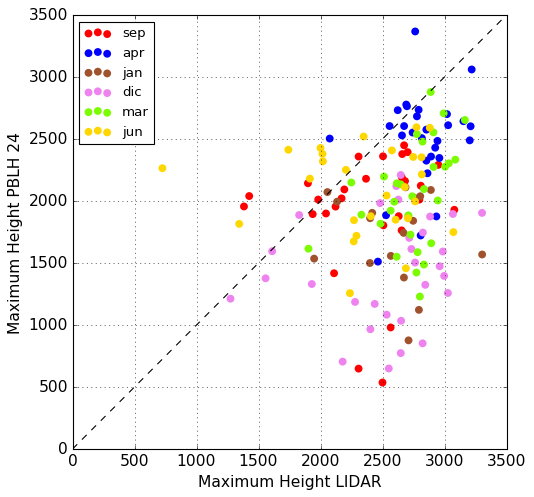

In [57]:
plt.figure(figsize=(7,7))
k = 0
for df in dataframes_names:
    k += 1
    #print('df', k)
    
    plt.scatter(dataframes_dict[df]['Raw_mean_max'], dataframes_dict[df]['PBLH_avg_24_max'], c = colors[k], edgecolors='none', s = 50, label = df)

    
plt.xlim(0,3500)
plt.ylim(0,3500)
plt.plot([0,3500], [0,3500], 'k--')

#plt.plot(xx, blt.ajuste_lineal(xx,  *popt_24))
plt.grid()
plt.legend(loc = 'upper left', fontsize = 12)
plt.xlabel('Maximum Height LIDAR')
plt.ylabel('Maximum Height PBLH 24')
plt.rcParams.update({'font.size': 14})

In [58]:
popt_48, pcov_48 = optimization.curve_fit(blt.ajuste_lineal, all_dataframes.dropna()['Raw_mean_max'], all_dataframes.dropna()['PBLH_avg_48_max'])

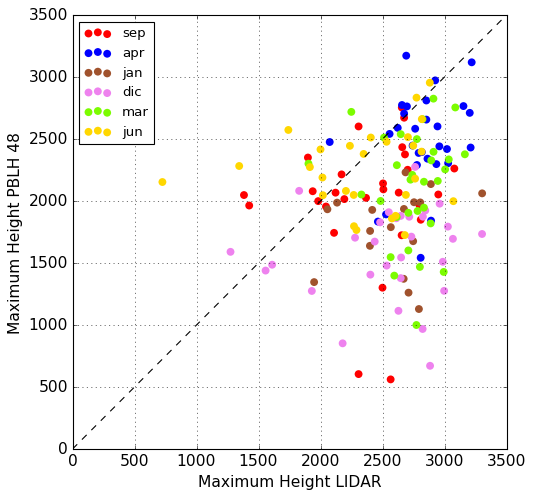

In [59]:
plt.figure(figsize=(7,7))
k = 0
for df in dataframes_names:
    k += 1
    #print('df', k)
    
    plt.scatter(dataframes_dict[df]['Raw_mean_max'], dataframes_dict[df]['PBLH_avg_48_max'], c = colors[k], edgecolors='none', s = 50, label = df)
    
plt.xlim(0,3500)
plt.ylim(0,3500)
#plt.plot(xx, blt.ajuste_lineal(xx,  *popt_48))
plt.plot([0,3500], [0,3500], 'k--')
plt.grid()
plt.legend(loc = 'upper left', fontsize = 12)
plt.xlabel('Maximum Height LIDAR')
plt.ylabel('Maximum Height PBLH 48')
plt.rcParams.update({'font.size': 14})

In [94]:
apr_max_h.time_PBLH_avg_24_max

0                     NaN
1     2015-04-02 21:00:00
2     2015-04-03 23:00:00
3     2015-04-04 23:00:00
4     2015-04-05 23:00:00
5     2015-04-06 23:00:00
6     2015-04-07 23:00:00
7     2015-04-08 23:00:00
8     2015-04-09 23:00:00
9     2015-04-10 22:00:00
10    2015-04-11 20:00:00
11    2015-04-12 21:00:00
12    2015-04-13 21:00:00
13    2015-04-14 21:00:00
14    2015-04-15 21:00:00
15    2015-04-16 20:00:00
16    2015-04-17 22:00:00
17    2015-04-18 21:00:00
18    2015-04-19 21:00:00
19    2015-04-20 21:00:00
20    2015-04-21 21:00:00
21    2015-04-22 21:00:00
22    2015-04-23 21:00:00
23    2015-04-24 21:00:00
24    2015-04-25 21:00:00
25    2015-04-26 21:00:00
26    2015-04-27 21:00:00
27    2015-04-28 23:00:00
28    2015-04-29 18:00:00
29    2015-04-30 22:00:00
Name: time_PBLH_avg_24_max, dtype: object

In [95]:
apr_max_h.time_PBLH_avg_24_max = apr_max_h.time_PBLH_avg_24_max.dt.tz_localize('UTC').dt.tz_convert('Etc/GMT-6')

AttributeError: Can only use .dt accessor with datetimelike values

In [90]:
apr_max_h.time_PBLH_avg_24_max = apr_max_h.time_PBLH_avg_24_max.dt.tz_localize('Etc/GMT-6').dt.tz_convert('UTC')
#apr_max_h.time_Raw_mean_max = apr_max_h.time_Raw_mean_max.dt.tz_localize('UTC').dt.tz_convert('Etc/GMT-6')
#apr_max_h.time_PBLH_avg_48_max = apr_max_h.time_PBLH_avg_48_max.dt.tz_localize('UTC').dt.tz_convert('Etc/GMT-6')

TypeError: Already tz-aware, use tz_convert to convert.

# time_PBLH_avg_24_max

In [71]:
plt.hist(apr_max_h.time_PBLH_avg_24_max[~np.isnan(apr_max_h.time_PBLH_avg_24_max)])

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [77]:
len(apr_max_h.time_PBLH_avg_24_max)

30

In [78]:
max_hours_24 = []
max_hours_48 = []
max_hours_lidar = []

for i in range(0,30):
    max_hours_24.append(apr_max_h.time_PBLH_avg_24_max[i].hour)
    max_hours_48.append(apr_max_h.time_PBLH_avg_48_max[i].hour)
    max_hours_lidar.append(apr_max_h.time_Raw_mean_max[i].hour)
    
max_hours_24 = np.array(max_hours_24)
max_hours_48 = np.array(max_hours_48)
max_hours_lidar = np.array(max_hours_lidar)


In [83]:
max_hours_24[~np.isnan(max_hours_24)]

array([ 3.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  4.,  2.,  3.,  3.,  3.,
        3.,  2.,  4.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        5.,  0.,  4.])

In [97]:
max_hours_48[~np.isnan(max_hours_48)]

array([ 4.,  5.,  5.,  4.,  6.,  6.,  4.,  4.,  3.,  5.,  3.,  4.,  3.,
        2.,  3.,  3.,  2.,  4.,  4.,  2.,  2.,  3.,  3.,  3.,  3.,  2.,
        6.,  4.,  1.])

(array([ 1.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  9.,  0.,
         0.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,
         0.,  0.,  3.]),
 array([ 1.        ,  1.17241379,  1.34482759,  1.51724138,  1.68965517,
         1.86206897,  2.03448276,  2.20689655,  2.37931034,  2.55172414,
         2.72413793,  2.89655172,  3.06896552,  3.24137931,  3.4137931 ,
         3.5862069 ,  3.75862069,  3.93103448,  4.10344828,  4.27586207,
         4.44827586,  4.62068966,  4.79310345,  4.96551724,  5.13793103,
         5.31034483,  5.48275862,  5.65517241,  5.82758621,  6.        ]),
 <a list of 29 Patch objects>)

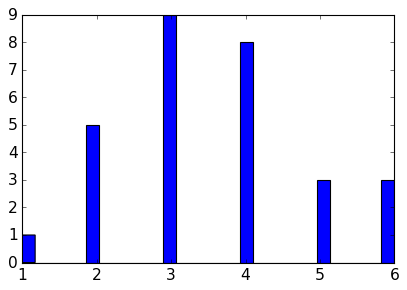

In [98]:
plt.hist(max_hours_48[~np.isnan(max_hours_48)], 29)

In [101]:
np.mod(-6,24)

18